# NumPy II: Universal Functions and Broadcasting

*Disclaimer: The contents of this notebook are developped according to Python Data Science Handbook, by Jake VanderPlas and Python for Data Analysis, by Wes McKinney*

The relative sluggishness of Python generally manifests itself in situations where many small operations are being repeated – for instance looping over arrays to operate on each element. NumPy's ufuncs, which can be used to make repeated calculations on array elements much more efficient through vectorized operations.

- Vectorized operation: perform an operation on the array which will then be applied to each element in the array
    
Vectorized operations in NumPy are implemented via ufuncs, whose main purpose is to quickly execute repeated operations on values in NumPy arrays. Ufuncs perform element-wise operations on data in ndarrays. Computations using vectorization through ufuncs are nearly always more efficient than their counterpart implemented using Python loops, especially as the arrays grow in size. Any time you see such a loop in a Python script, you should consider whether it can be replaced with a vectorized expression.


In [1]:
import numpy as np
np.random.seed(0)
values = np.random.randint(1, 10, size=5)
print(1.0 / values) # vectorized operation between scalar and array

[0.16666667 1.         0.25       0.25       0.125     ]


In [2]:
# vectorized operation between two arrays
a = np.arange(5)
b = np.arange(1, 6)
a / b

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

In [3]:
# vectorized operation on multidimensional arrays
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]])

In [4]:
x ** 2

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]])

Arithemtic operations with scalars propagate the scalar argument to each element in the array

### NumPy's UFuncs
Ufuncs exist in two flavors: unary ufuncs, which operate on a single input, and binary ufuncs, which operate on two inputs.

In [5]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
# unary ufuncs
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [7]:
x = np.random.randn(8)
x

array([ 1.86755799, -0.97727788,  0.95008842, -0.15135721, -0.10321885,
        0.4105985 ,  0.14404357,  1.45427351])

In [8]:
y = np.random.randn(8)
y

array([ 0.76103773,  0.12167502,  0.44386323,  0.33367433,  1.49407907,
       -0.20515826,  0.3130677 , -0.85409574])

In [9]:
np.maximum(x, y)

array([1.86755799, 0.12167502, 0.95008842, 0.33367433, 1.49407907,
       0.4105985 , 0.3130677 , 1.45427351])

Here `np.maximum` computed the element-wise maximum of the elements in `x` and `y`

While not common, a ufunc can return multiple arrays. `modf` is one example. It returns the fractional and integral parts of a floating point array

In [10]:
arr = np.random.randn(7) * 5
arr

array([-12.76494908,   3.26809298,   4.32218099,  -3.7108251 ,
        11.34877312,  -7.27182837,   0.22879259])

In [11]:
remainder, whole_part = np.modf(arr)
remainder

array([-0.76494908,  0.26809298,  0.32218099, -0.7108251 ,  0.34877312,
       -0.27182837,  0.22879259])

In [12]:
whole_part

array([-12.,   3.,   4.,  -3.,  11.,  -7.,   0.])

Ufuncs accept an optional `out` argument that allows them to operate in-place on arrays

In [13]:
arr = np.abs(arr)
arr

array([12.76494908,  3.26809298,  4.32218099,  3.7108251 , 11.34877312,
        7.27182837,  0.22879259])

In [14]:
np.sqrt(arr)

array([3.57280689, 1.80778676, 2.07898557, 1.9263502 , 3.36879402,
       2.69663278, 0.47832268])

In [15]:
arr

array([12.76494908,  3.26809298,  4.32218099,  3.7108251 , 11.34877312,
        7.27182837,  0.22879259])

In [16]:
np.sqrt(arr, out = arr)

array([3.57280689, 1.80778676, 2.07898557, 1.9263502 , 3.36879402,
       2.69663278, 0.47832268])

In [17]:
arr

array([3.57280689, 1.80778676, 2.07898557, 1.9263502 , 3.36879402,
       2.69663278, 0.47832268])

#### Array Arithmetic
NumPy's ufuncs feel very natural to use because they make use of Python's native arithmetic operators. The standard addition, subtraction, multiplication, division, remainder, exponentiation can all be used. In addition, these operations can be strung together however you wish, and the standard order of operations is respected. Each of these arithmetic operations are simply convenient wrappers around specific functions built into NumPy; for example, the `+` operator is a wrapper for the `add` function

<div>
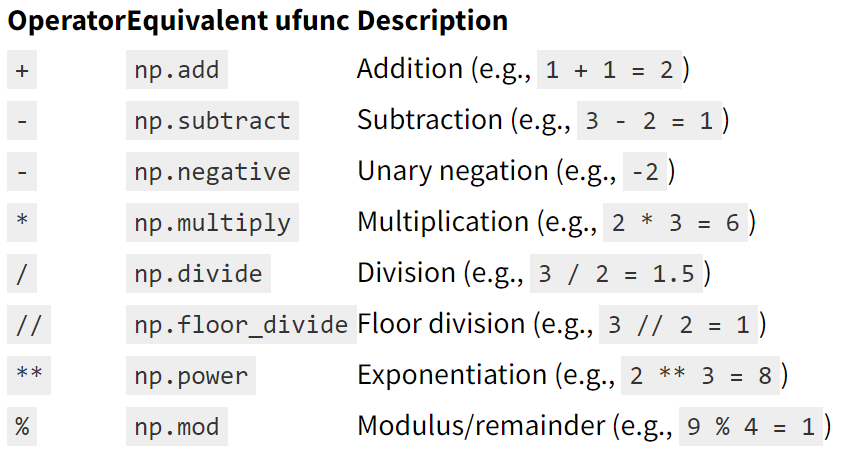
</div>

In [18]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]
-x     =  [ 0 -1 -2 -3]
x ** 2 =  [0 1 4 9]
x % 2  =  [0 1 0 1]


In [19]:
-(0.5 * x + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

In [20]:
np.add(x, 2)

array([2, 3, 4, 5])

#### Other NumPy UFuncs: Absolute Values, Trig, Exponentials and Logrithms
Just as NumPy understands Python's built-in arithmetic operators, it also understands Python's built-in absolute value function. The corresponding NumPy ufunc is `np.absolute`, which is also available under the alias `np.abs`. 

In [ ]:
x = np.array([-2, -1, 0, 1, 2])
abs(x)

In [ ]:
np.abs(x)

In [49]:
theta = np.linspace(0, np.pi, 3)
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))

theta      =  [0.         1.57079633 3.14159265]
sin(theta) =  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) =  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) =  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [ ]:
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

In [ ]:
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))

In [ ]:
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

### Expressing Conditional Logic as Array Operations
The `np.where` functon is a vectorized version of the ternary conditional expression `x if condition else y`. Suppose we have a boolean array and two arrays of values

In [51]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [54]:
xarr

array([1.1, 1.2, 1.3, 1.4, 1.5])

In [52]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

In [53]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to `np.where` do not need to be arrays. One or both of them can be scalars. A typical use of `np.where` in data analysis is to produce a new array of values based on another array. Suppose you have a matrix of randomly generated data and you want to replace all positive values with 3 and all negative values with -3

In [ ]:
arr = np.random.randn(4, 4)
arr

In [ ]:
arr > 0

In [ ]:
# it generates a copy
np.where(arr > 0, 3, -3)

In [ ]:
arr

You cann combine scalars and arrays when using `np.where`. For example, we will replace all positive values in arr with 3

In [50]:
np.where(arr > 0, 3, arr) # set only positive values to 2

array([[-0.18718385,  3.        ,  3.        ,  3.        ],
       [ 3.        , -0.88778575, -1.98079647, -0.34791215],
       [ 3.        ,  3.        ,  3.        , -0.38732682],
       [-0.30230275, -1.04855297, -1.42001794, -1.70627019]])

In [ ]:
arr

### Advanced UFunc Features

#### Specifying Output
For large calculations, it is sometimes useful to be able to specify the array where the result of the calculation will be stored. Rather than creating a temporary array, this can be used to write computation results directly to the memory location where you'd like them to be. For all ufuncs, this can be done using the `out` argument of the function

In [ ]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out = y)
print(y)

In [ ]:
y = np.zeros(10)
np.power(2, x, out = y[::2])
print(y)

#### Aggregations
For binary ufuncs, there are some interesting aggregates that can be computed directly from the object.

<div>
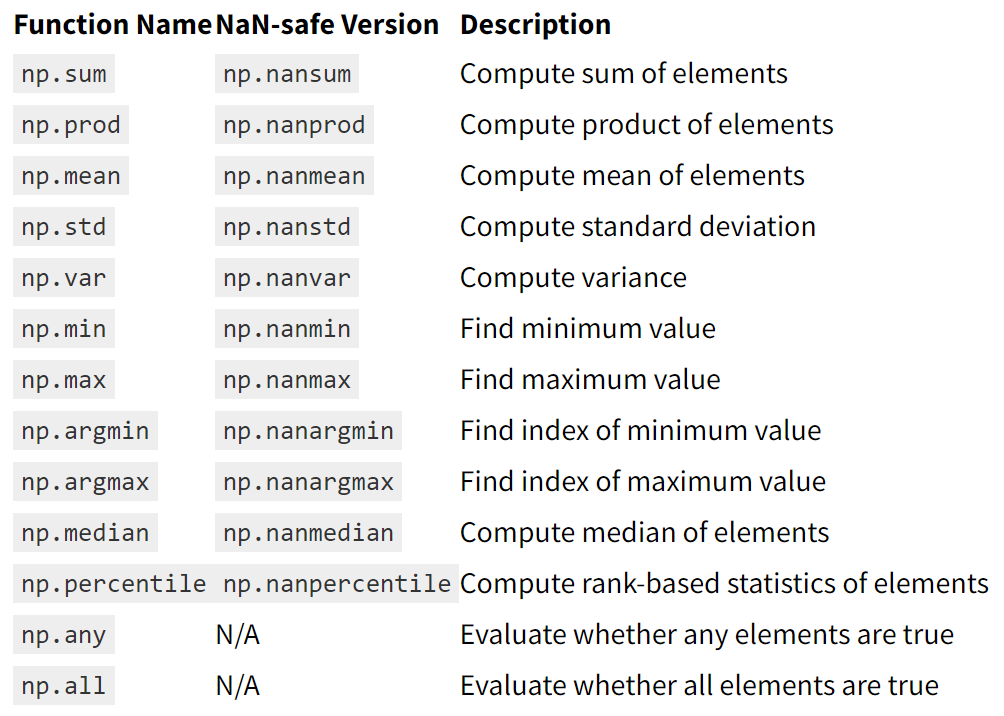
</div>

For `min`, `max`, `sum`, and several other NumPy aggregates, a shorter syntax is to use methods of the array object itself. It is worthing noting that Python has built-in functions such as `sum`, `max` and `min`. They are not identical.

Most aggregates have a NaN-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point `NaN` value

You should be aware that `NaN` is a bit like a data virus, it infects any other object it touches. Regardless of the operation, the result of arithmetic with `NaN` will be another `NaN`

In [37]:
1 + np.nan

nan

In [38]:
0 *  np.nan

nan

In [39]:
vals2 = np.array([1, np.nan, 3, 4]) 

In [40]:
vals2.sum()

nan

In [41]:
np.nansum(vals2)

8.0

In [42]:
# Python's built-in max and min
big_array = np.random.rand(1000000)
min(big_array), max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

In [43]:
np.min(big_array), np.max(big_array)

(7.071203171893359e-07, 0.9999997207656334)

In [44]:
print(big_array.min(), big_array.max(), big_array.sum())

7.071203171893359e-07 0.9999997207656334 500384.21988863125


#### Multi Dimensional Aggregates
One common type of aggregation operation is an aggregate along a row or column. **By default, each NumPy aggregation function will return the aggregate over the entire array**. Aggregation functions take an additional argument specifying the axis along which the aggregate is computed. For example, we can find the minimum value within each column by specifying `axis = 0`. For aggregation along the row, use `axis = 1`. The `axis` keyword specifies the dimension of the array that will be collapsed, rather than the dimension that will be returned. So specifying `axis = 0` means that the first axis will be collapsed: for two-dimensional arrays, this means that values within each column will be aggregated

In [46]:
M = np.random.random((3, 4))
M

array([[0.22427565, 0.40610863, 0.70961517, 0.03877862],
       [0.17982919, 0.41072366, 0.55794889, 0.52625786],
       [0.24043368, 0.11913307, 0.42514208, 0.71292416]])

In [47]:
M.sum()

4.551170659971195

In [48]:
M.sum(axis = 0)

array([0.64453852, 0.93596536, 1.69270613, 1.27796065])

In [ ]:
M.min(axis = 0)

In [ ]:
M.max(axis = 1)

In [7]:
M.argmax()

4

In [8]:
M.argmin()

10

In [4]:
M.argmax(axis = 1)

array([3, 0, 1], dtype=int64)

In [5]:
M.argmax(axis = 0)

array([1, 2, 1, 0], dtype=int64)

In [9]:
M.cumsum()

array([0.4236548 , 1.06954891, 1.50713612, 2.39890912, 3.36257188,
       3.7460134 , 4.53773844, 5.06663336, 5.63467792, 6.56027456,
       6.63131062, 6.71843992])

Functions like `min` and `max` take an optional `axis` argument that computes the statistic over the given axis, resulting in an array with **one fwer dimension**

In [ ]:
M.cumsum(axis = 0)

In [ ]:
M.cumprod(axis = 1)

In multidimensional arrays, accumulation functions such as `cumsum` return an array of the same size of the input array, but with the partial aggregates computed along with the indicated axis according to each lower dimensional slice

### `unique` and Other Set Logic
NumPy has some basic set operations for one-dimensional ndarrays. A commonly used one is `np.unique` which returns the **sorted unique values** in an array

In [58]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [59]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

Contrast `np.unique` with the pure Python alternative

In [60]:
sorted(set(names))

['Bob', 'Joe', 'Will']

Another function `np.in1d(x, y)` which computes a boolean array indicating whether each element of x is contained in y

In [ ]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

#### Case Study: Average Heights of US Presidents

In [55]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style

%matplotlib inline

In [56]:
data = pd.read_csv('president_heights.csv')
heights = np.array(data['height(cm)'])
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'president_heights.csv'

In [ ]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

In [ ]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

In [ ]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number')

### Computation on Arrays: Broadcasting
NumPy's universal functions can be used to vectorize operations and thereby remove slow Python loops. Another means of vectorizing operations is to use NumPy's broadcasting functionality. Broadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

For arrays of the same size, binary operations are performed on an element-by-element basis. Broadcasting allows these types of binary operations to be performed on arrays of different sizes. For example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array, add a one dimensioanl array to a two dimensional array or add two multi dimensional arrays with different dimensions.

In [ ]:
# add two arrays with same dimensions
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

In [ ]:
# add an array with a scalar
a + 5

In [ ]:
c = np.ones((3, 3))
c

In [ ]:
# add a two dimensional array with a one dimensional array
# the one-dimensional array a is stretched, or broadcast across the second dimension in order to match the shape of c
c + a

In [ ]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

In [ ]:
a + b

Just as before we stretched or broadcasted one value to match the shape of the other, here we've stretched both `a` and `b` to match a common shape, and the result is a two-dimensional array! The geometry of these examples is visualized in the following figure

<div>
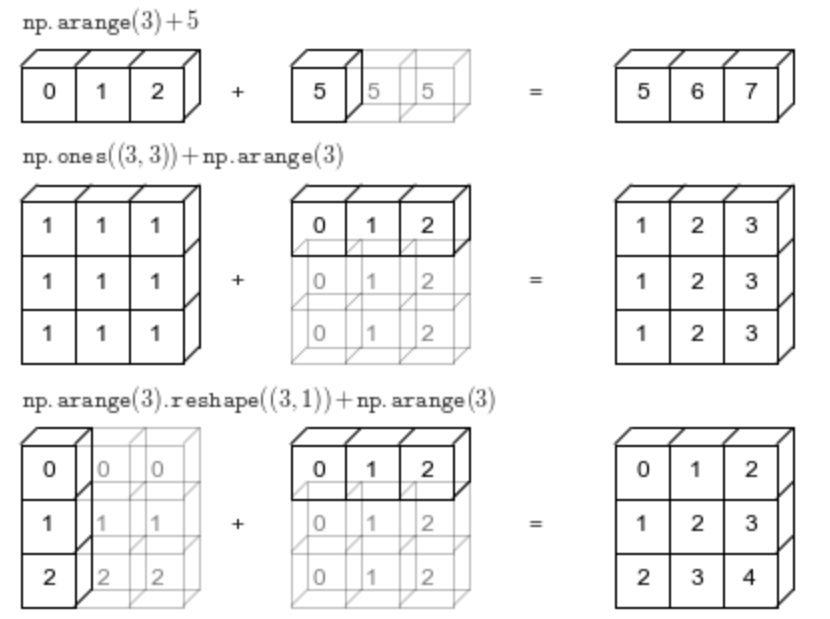
</div>

### Rules of Broadcasting
Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

In [57]:
M = np.ones((3, 2))
a = np.arange(3)

#### Centering an Array

In [ ]:
X = np.random.random((10, 3))
Xmean = X.mean(0)
Xmean

In [ ]:
X_centered = X - Xmean

In [ ]:
X_centered.mean(0)